# Space missions analysis

### Want to see country wise space missions, number of successful missions so far, costliest mission, most launches in a single year and more? All these cool questions are awnsered here.

Regarding data -
Thanks to the data from https://www.kaggle.com/agirlcoding/all-space-missions-from-1957, which intern got it from https://nextspaceflight.com/launches/past/?page=1 we got some amezing dataset.

This is an effort to use Python data science techniches to process real word data and make some logical inferences out of it.

In [1]:
project_name = "Space_Missions_Analysis"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

## Data Preparation and Cleaning

Let's first analyze the data and see basic information and see if we can get some trends.

In [4]:
# First save our data into our project
jovian.commit(files=['Space_Mission_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

In [5]:
# Import required module here
import pandas as pd
import numpy as np

In [6]:
# Read CSV file in pandas
space_df = pd.read_csv('Space_Mission_Data.csv')

In [7]:
# Basic info of our dataset
space_df.info()
# info() is showing we have we have 8 columns and 4334 rows
# For most part we have all the records except column 'Rocket' which is "Cost of the mission: in $ million"

# one more way to find the number of rows and columns
space_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           4324 non-null   int64  
 1   Company Name    4324 non-null   object 
 2   Location        4324 non-null   object 
 3   Datum           4324 non-null   object 
 4   Detail          4324 non-null   object 
 5   Status Rocket   4324 non-null   object 
 6   Cost            964 non-null    float64
 7   Status Mission  4324 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 270.4+ KB


(4324, 8)

In [8]:
# Check the columns
space_df.columns
# We have these columns
# 'Index' - Which is index
# 'Company Name' - Who launched the mission
# 'Location' - From where it launched
# 'Datum' - When the launch happened
# 'Detail' - Rocker name
# 'Status Rocket' - Status of rocket active/retired
# 'Cost' - Cost of the mission: in $ million
# 'Status Mission' - Status of mission

Index(['Index', 'Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Cost', 'Status Mission'],
      dtype='object')

In [15]:
# See if you can get some stats
space_df.describe
# Looks like nothing much you can out of describe :)

<bound method NDFrame.describe of       Index Company Name                                           Location  \
0         0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2         2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3         3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4         4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...     ...          ...                                                ...   
4319   4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320   4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321   4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322   4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323   4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                 

In [28]:
# At this time the data is almost ready for processing
# but one column which I would add here is country 
# This can be done using the location column and some massaging
# pandas series needs to be split after type casting 
space_df['Country'] = space_df.Location.str.split(',').str[-1]


In [12]:
# The date in Datum is in string format
# Convert it to pandas native datetime format
space_df['Datum'] = pd.to_datetime(space_df['Datum'], infer_datetime_format=True, utc=True)
# Create year column from datetime
space_df['Year'] = space_df.Datum.dt.year
# Create Month as name column from datetime
space_df['Month'] = space_df.Datum.dt.month_name()

In [13]:
# We can now see there are 22 unique countries in space race and Russia has hosted most launch so far.
space_df.Country.describe()

count        4324
unique         22
top        Russia
freq         1395
Name: Country, dtype: object

In [14]:
import jovian

In [15]:
jovian.commit(files=['Space_Mission_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

## Exploratory Analysis and Visualization



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


<AxesSubplot:xlabel='Datum', ylabel='Cost'>

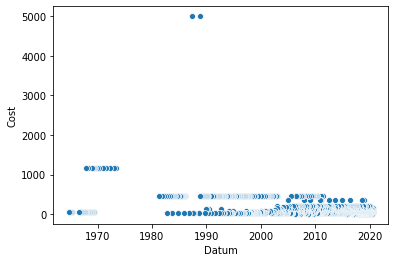

In [17]:
# If we print cost/price of mission trend, we can see 
# There are many missions for which data is not available
# Mostly cost is less than 500 million $
# There are few exceptions which has cost more than 1000 and two missions costing more than 5000
# But overall trend is price for launch is reducing 
# may be because of advancements in technology and/or we getting better
# Will use this later for further analysis
sns.scatterplot('Datum','Cost', data=space_df)



In [18]:
# Find out more about 'Status Mission' column
# There are four differnt values available for this column
# Most of the missions are successful
# Will use this later for further analysis
space_df['Status Mission'].describe()

count        4324
unique          4
top       Success
freq         3879
Name: Status Mission, dtype: object

In [19]:
# Let's find Cost specific details
# If we use Cost directly on all the data then it will not give us desired result because only about 1/4 data has this field
# We have to make sure we trim this field (may be remove Nan)
space_df['Cost'].describe()

count     964.000000
mean      153.792199
std       288.450732
min         5.300000
25%        40.000000
50%        62.000000
75%       164.000000
max      5000.000000
Name: Cost, dtype: float64

<AxesSubplot:xlabel='Datum', ylabel='Country'>

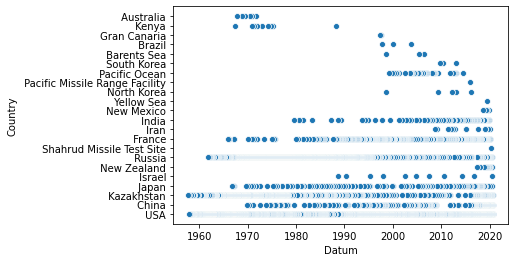

In [29]:
# Another intresting stat we can find is Country to Datum
# USA, Russia, France, China, India, Japan are dominating players in space race.
# Kazakhstan is there but it is hard to tell as the site is getting used by Rassia, USA and probably other countries as well
sns.scatterplot('Datum','Country', data=space_df)

In [7]:
import jovian

In [23]:
jovian.commit(files=['Space_Mission_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

## Asking and Answering Questions

Now that we have done our exploration and data looks clean let's awnser some intresting questions using that dataset

# 1 Find out company's success rate

- Get only required columns ('Status Mission','Company Name')
- Do the group by on selected columns
- Count the combination using size
- Reset the count to Counts
- Only conside companies with more than 50 missions

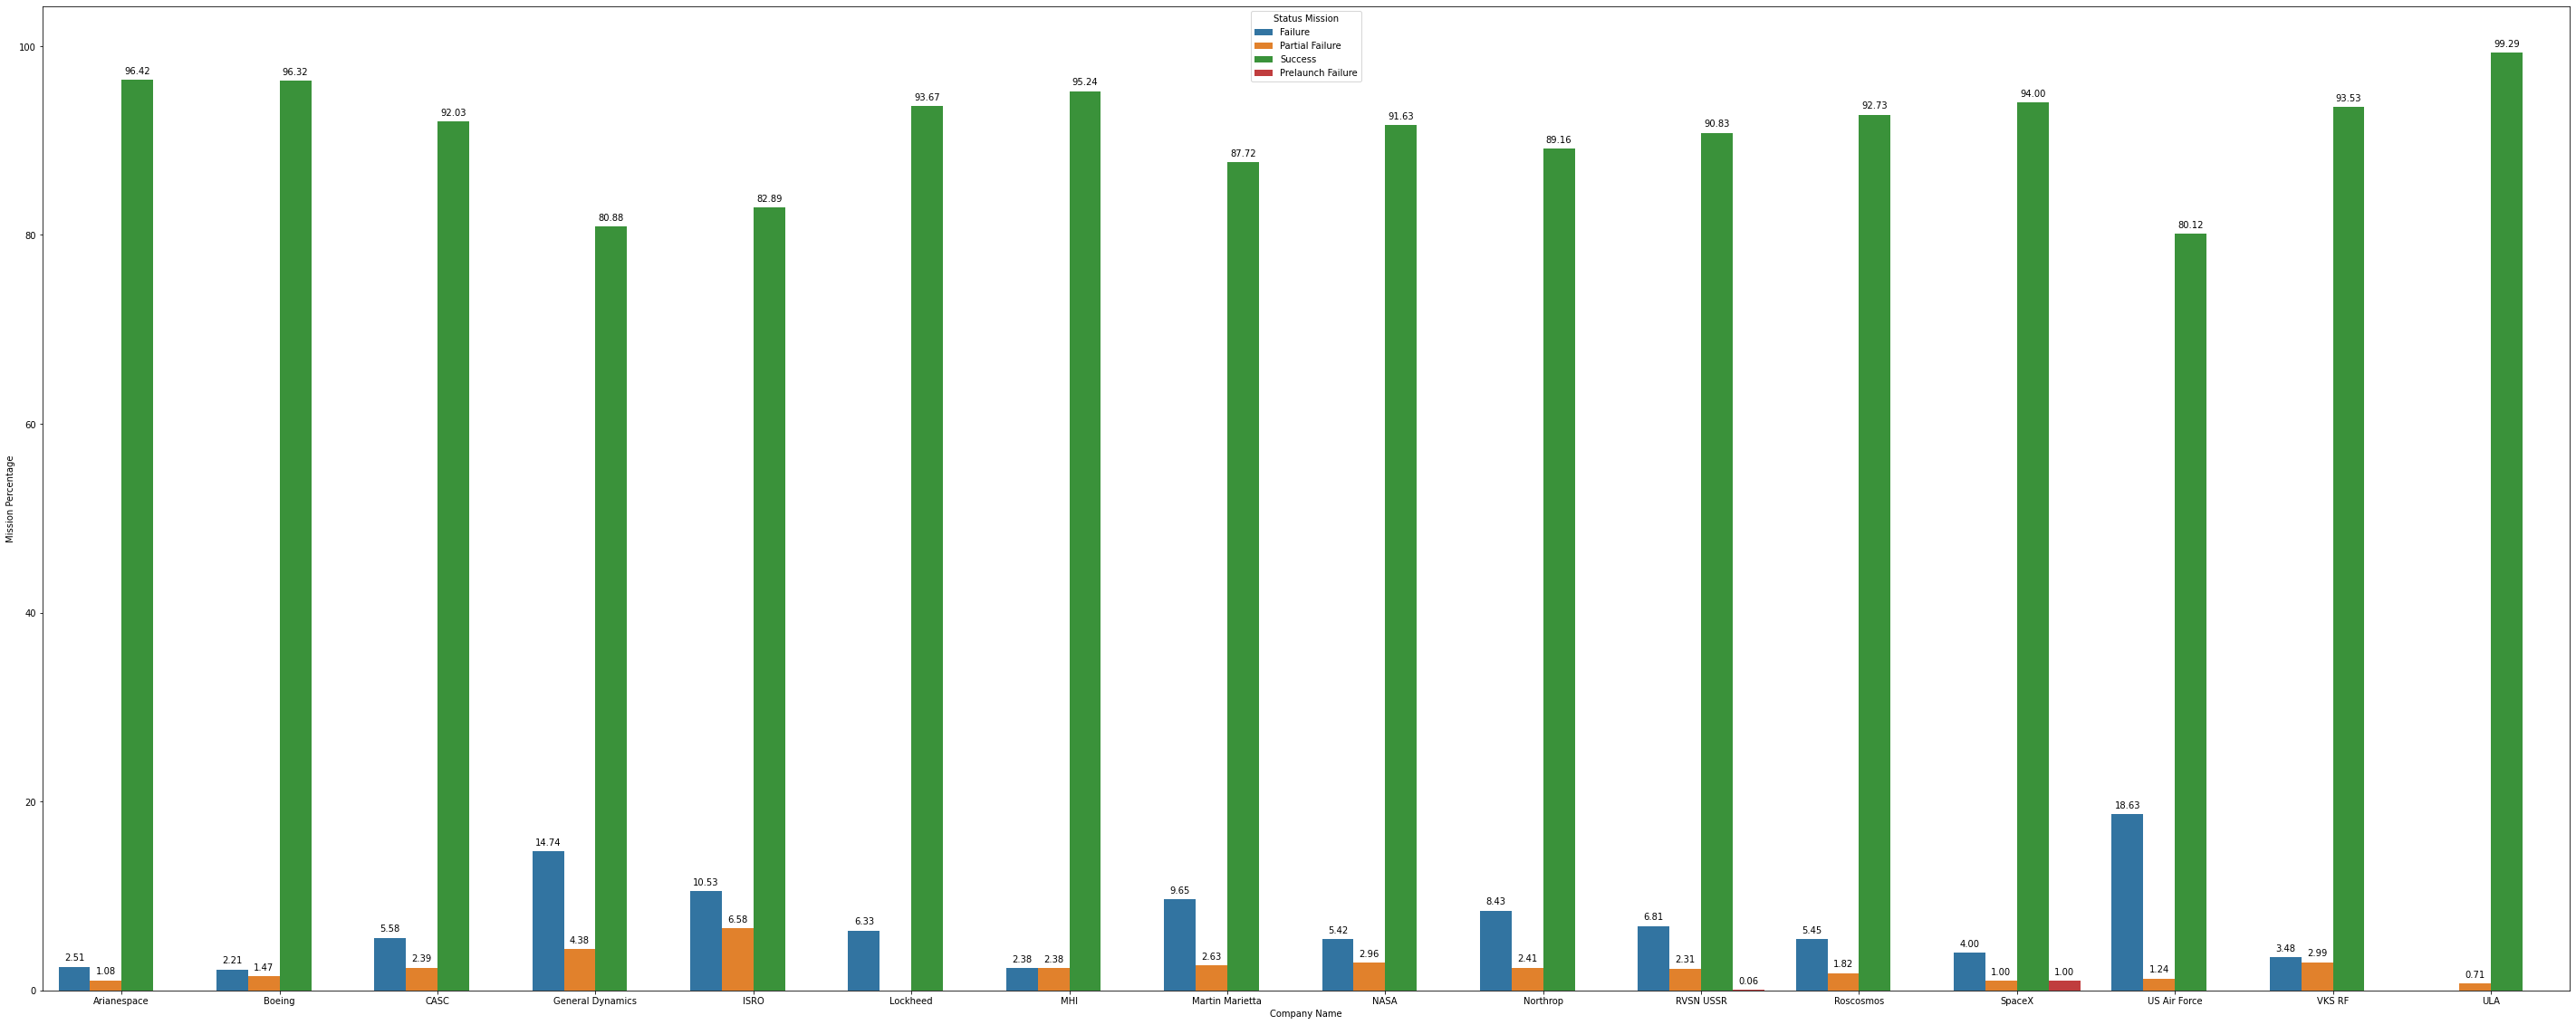

In [9]:
group_df = space_df.groupby(['Status Mission','Company Name']).size().reset_index(name='Counts')
new_df = group_df.groupby(['Company Name']).sum().reset_index()
top_companies = new_df[new_df['Counts'] > 50]

final_df = pd.merge(group_df, top_companies, how='inner', on=['Company Name'])
final_df['Mission Percentage'] = final_df['Counts_x'] * 100 / final_df['Counts_y']
fig, ax1 = plt.subplots(figsize=(50, 20))

# Add annote to bar graph
splot = sns.barplot('Company Name', 'Mission Percentage', hue='Status Mission', data=final_df, ax=ax1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Observations - 
- Average success rate is around mid 90 with few outlyers like 'General Dynamics', 'US Air Force' and 'ULA'
- Failure rate is genrally more or less 5% with same outlyers as above
- Hardly any prelaunch failures
- Partial failures are lesser than full failures

# 2 Time series plot of missions over the years

Text(0.5, 1.0, 'Over the years mission trends')

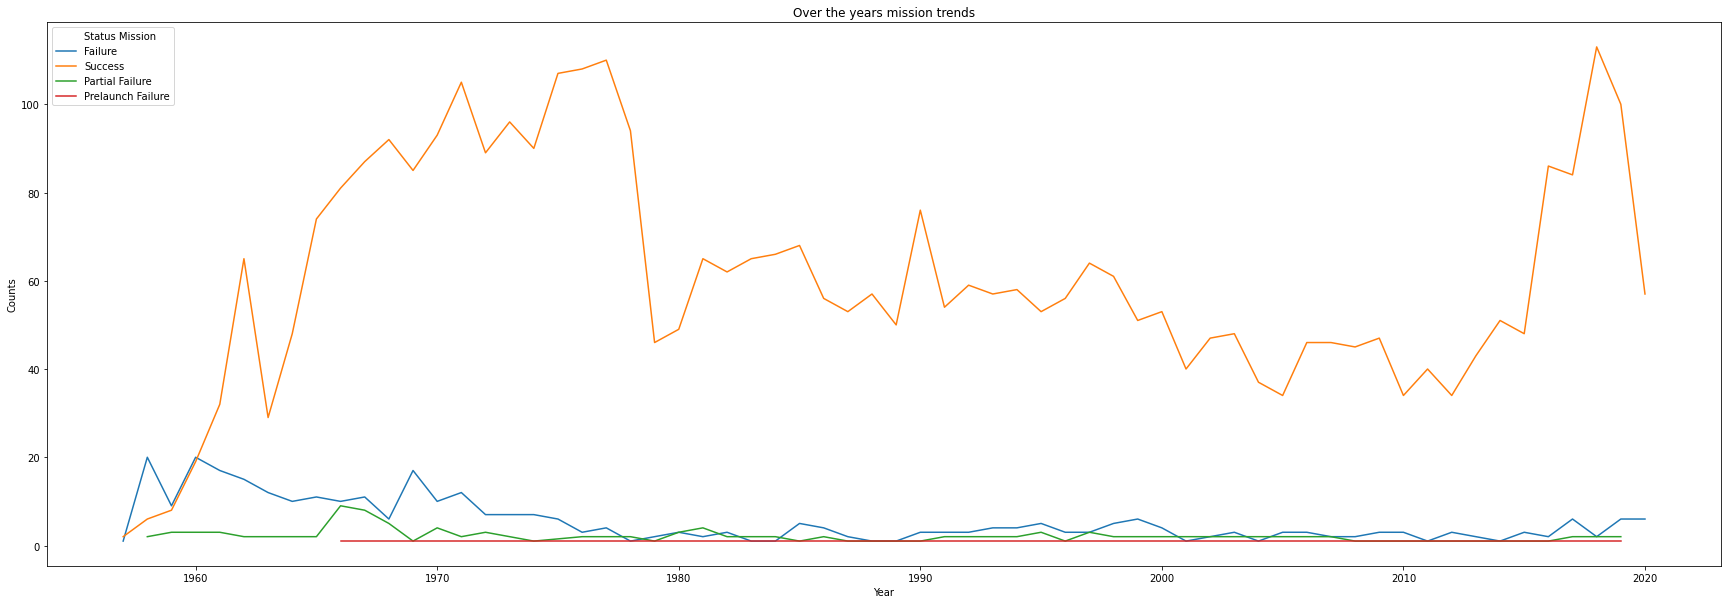

In [18]:
# Group Year and Status Mission columns and store the sum into Counts column
group_df = space_df.groupby(['Year','Status Mission']).size().reset_index(name='Counts')
fig, ax1 = plt.subplots(figsize=(30, 10))
sns.lineplot(data=group_df, x="Year", y="Counts", hue='Status Mission')
plt.title('Over the years mission trends')

## Observations
- Clear space race can be seen from late 1960 till early 1980
- Overall, missions happening over the year is around 60. This is increasing and last few years it is close to 100 missions.
- More missions happened in recent years
- Most of the parts success and failure rates are directly proportionate. This is getting change lately for good. Failure rate is going down and success rate is climbing up

# 3 Time series plot of mission costs over the years

Text(0.5, 1.0, 'Over the years mission cost trend')

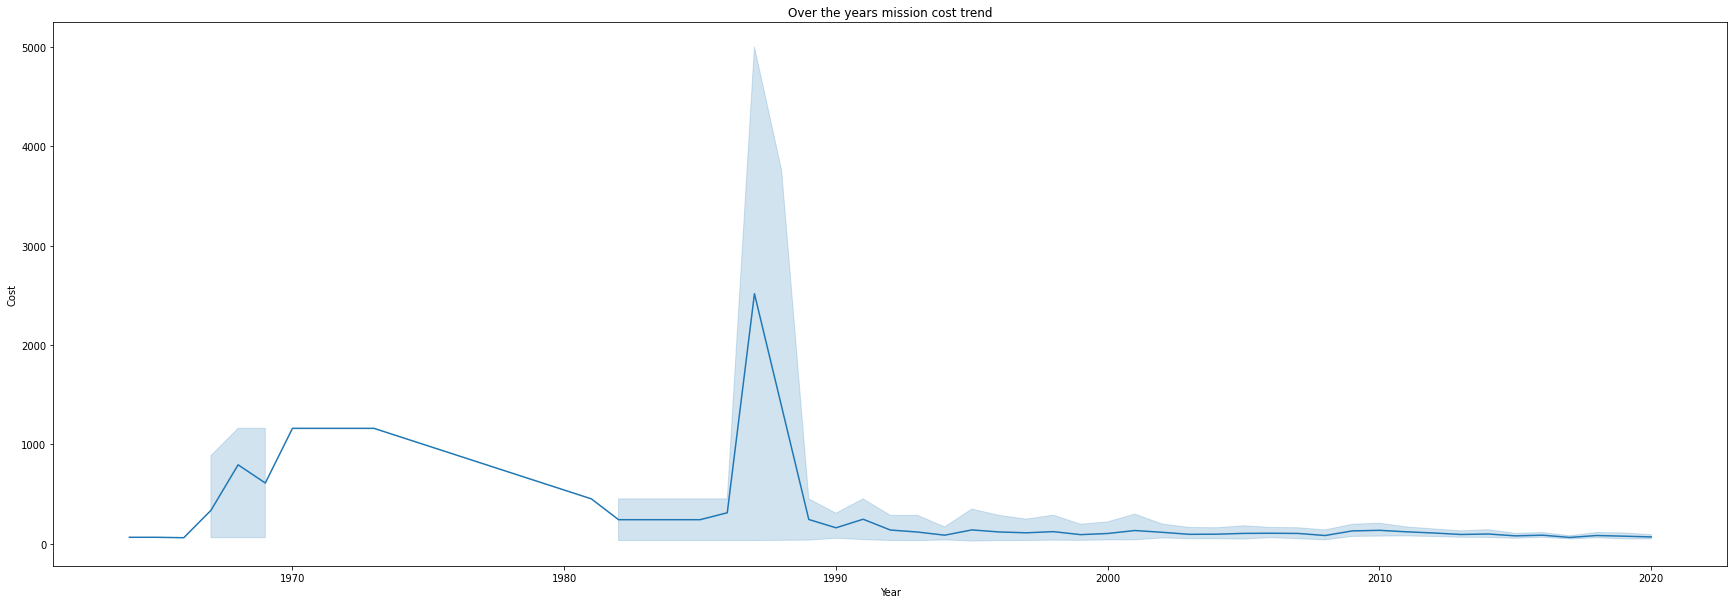

In [20]:
# Group Year, Status Mission and Cost columns and store the sum into Counts column
group_df = space_df.groupby(['Year','Status Mission', 'Cost']).size().reset_index(name='Counts')
fig, ax1 = plt.subplots(figsize=(30, 10))
sns.lineplot(data=group_df, x="Year", y="Cost")
plt.title('Over the years mission cost trend')

## Observations
- Cost of hosting a mission is decreasing
- There are few entries in late 1980 which has costliest missions

# 4 Top 15 locations

Text(0.5, 1.0, 'Top 15 locations for space launches')

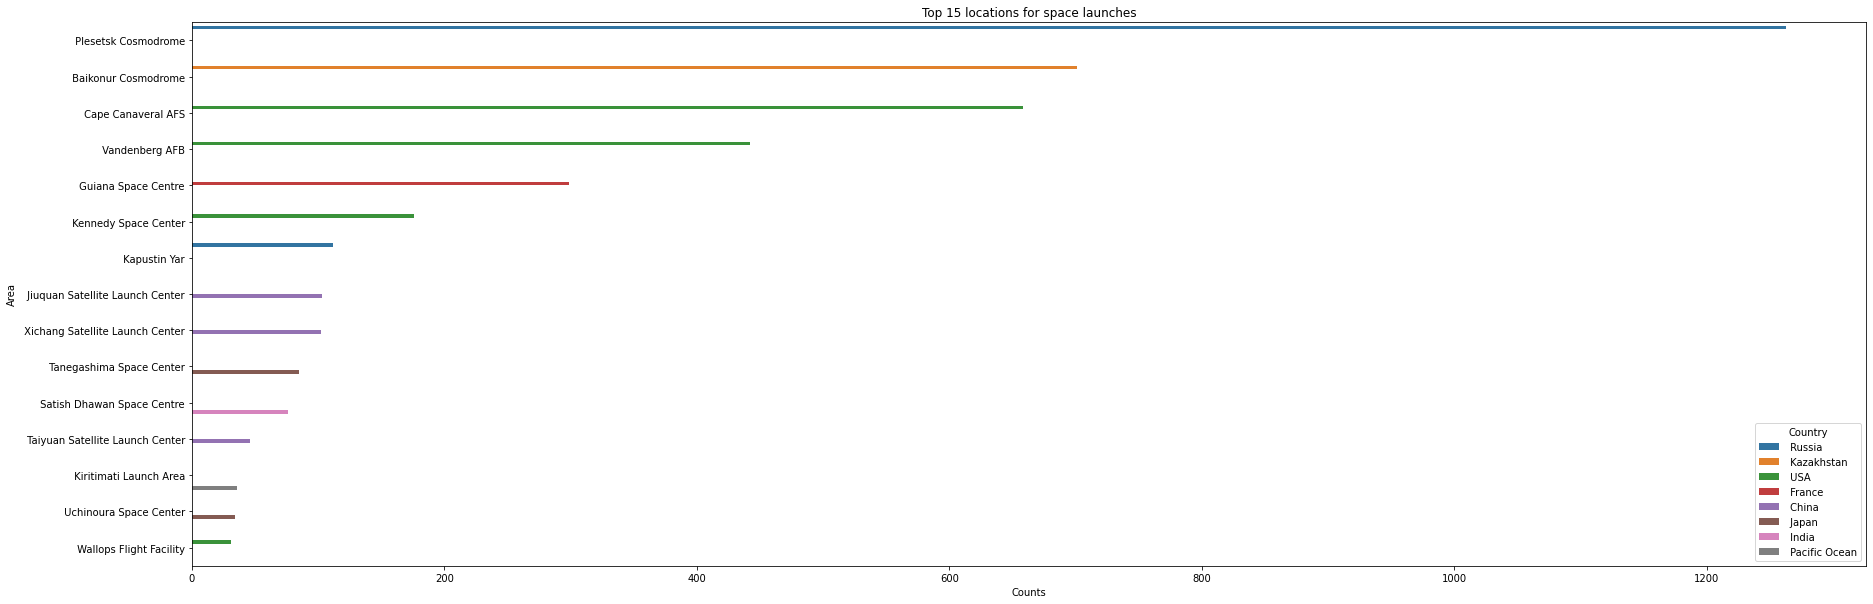

In [23]:
# The Location column in general has three parts site/area/<some times state>/Country
# For this plot just focus on second part i.e. area
space_df['Area'] = space_df.Location.str.split(',').str[1]
group_df = space_df.groupby(['Area', 'Country']).size().reset_index(name='Counts')
fig, ax1 = plt.subplots(figsize=(30, 10))
sns.barplot(data=group_df.sort_values(by=['Counts'], ascending=False).head(15), x="Counts", y="Area", hue='Country')
plt.title('Top 15 locations for space launches')
# Having country here is bearking graph's style but providing more value to it in general.

## Observation
- Plesetsk Cosmodrome from Russia is the top launching site which has hosted ~1300 missions
- Next in the list is Baikonur Cosmodrome from Kazakhstan

# 5 Which is the favourate month?

Text(0.5, 1.0, 'Monthly mission trends')

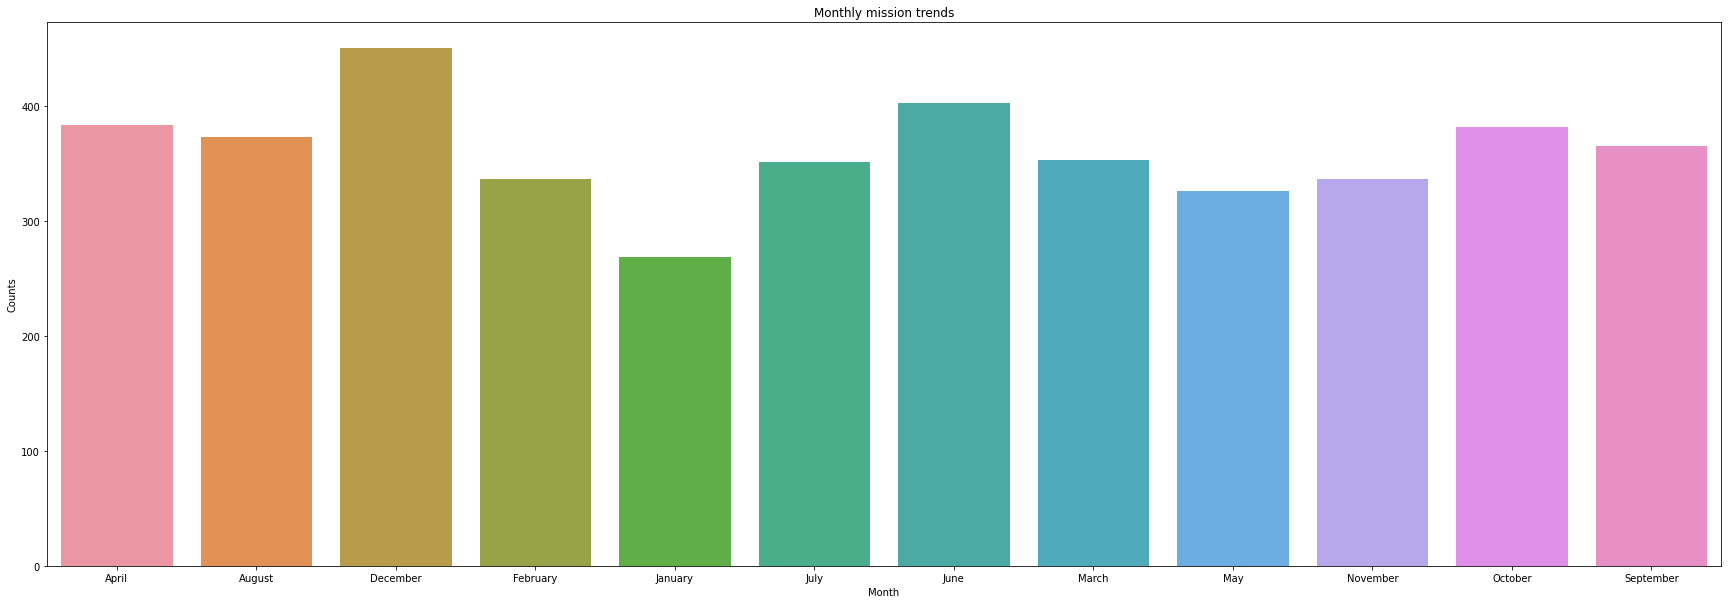

In [26]:
# Group Month column and store the sum into Counts column
group_df = space_df.groupby(['Month']).size().reset_index(name='Counts')
fig, ax1 = plt.subplots(figsize=(30, 10))
sns.barplot(data=group_df, x="Month", y="Counts")
plt.title('Monthly mission trends')

## Observation
- Average 350 missions are launched every month
- Most launches happend in the month of December
- January is the least favorate month

In [24]:
import jovian

In [25]:
jovian.commit(files=['Space_Mission_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

## Inferences and Conclusion

To close it of here are my overall inferences
1. Overall data is in good shape. Most of the columns have valid values except 'Cost'.
2. When it comes to launches happened in Kazakhstan it is not possible with just this data to find out for which country the launch was organized.
3. The trend in recent years is good more new countries and companies are taking part in space missions.
4. In continuation to above point the success rate has improved and we see very failures.
5. Also the cost is reducing making it more affortable for developing countries to join the race.

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'

## References and Future Work

As a next step, if we get more data around space missions like Man/Unmaned, Capacity (fuel, crew), distance covered or days the mission planned for then, we can find more inferences and can hopefully create dataset/plots which will help future missions.
- Dataset - https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
- Additional space missions information - https://nextspaceflight.com/launches/past/?page=1

Special thanks to Jovian for not only providing indepth knowledge and sharing technics in data science but also keeping all the participants of the cource motivated and engage thrghout the whole cource.

In [34]:
import jovian

In [35]:
jovian.commit(files=['Space_Mission_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nikhilshirke/space-missions-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/nikhilshirke/space-missions-analysis


'https://jovian.ml/nikhilshirke/space-missions-analysis'